Hi! This notebook is a labour of love. 
Please credit https://github.com/MargheritaPhilipp should you ever pass it on.

### 0. Intro

A bit on markdown and native python things.

This section is written in mark down. Here you can 
1. Create numbered lists, make words **bold**, *italic*, or ***both***,
- create bullet points lists
and highlight `variable_names`

Below are some example of things you can do that are just native to python and don't require the import of any libraries into your notebook.

Also note that normally you would import all the libraries you need at the start of a .py or of your notebook. Here we make an exception to make it clear what sections use which of the libraries (at least for the first time within the notebook).


In [1]:
# adding numbers
print(type(4.2))
print(4.2 + 3.8 )

# "adding" strings together
print(type('hello'))
print('hello' + "_my_" + 'friend')

# "adding" lists together
print(type(['do', 'I']))
print(['do', 'I']+ ['know', "you"])

<class 'float'>
8.0
<class 'str'>
hello_my_friend
<class 'list'>
['do', 'I', 'know', 'you']


### 1. EDA on WB pop data

Each section links to some of the questions that were tasks in class.

#### 1.1 Importing data

Relative paths are better for collaboration.


Addresses the following questions from class:
- Import the WB data (can you do it via a relative path?)

In [2]:
import pandas as pd

# importing with absolute path: you won't be able to run this directly 

df = pd.read_csv('/Users/tarangkadyan/Documents/Class Notes/brushup_files/WB_data.csv')

In [8]:
import os

# importing with relative path: if you have saved this file in a folder that has a data subfolder with the same csv inside, you can run this directly 

# get current working directory
cwd = os.getcwd()
print(cwd)

df_og = pd.read_csv(cwd + '/WB_data.csv')

/Users/tarangkadyan/Documents/Class Notes/brushup_files


#### 1.2. Starting inspection



Addresses the following questions from class:
- Display the head, check for missing values
- Find the min and max values - overall and just for 2023
- Which countries do they belong to?
- Inspect the values in the “Country Code” column

In [9]:
# show the dimensions (rows and columns) of the data set and display first few rows
print(df.shape)

# other options:
# df.tail(2)
# df.sample(4)

df_og.head() # default is 5

(218, 13)


,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,19688632,21000256,22645130,29249157,30466479,31541209,40099462,41128771,42239854
1,"Population, total",SP.POP.TOTL,Albania,ALB,3060173,3051010,3039616,2905195,2900401,2895092,2811666,2777689,2745972
2,"Population, total",SP.POP.TOTL,Algeria,DZA,31200985,31624696,32055883,36543541,37260563,38000626,44177969,44903225,45606480
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,58324,58177,57941,54310,53691,52995,45035,44273,43914
4,"Population, total",SP.POP.TOTL,Andorra,AND,67820,70849,73907,70567,71013,71367,79034,79824,80088


In [10]:
# sometimes not all columns are visible so it can be useful to get the full list

df_og.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code', '2001',
       '2002', '2003', '2011', '2012', '2013', '2021', '2022', '2023'],
      dtype='object')

Note that while .head() is a ***method*** I apply to the data frame, .shape and .columns are ***attributes*** of the data frame object/ class that I can call

- Example with planets class (10 mins): https://www.youtube.com/watch?v=LwFnF9XoEf
- Example with house class (7 mins): https://www.youtube.com/watch?v=3zoyA3U2Ka0


In [11]:
# the info method also tells us which columns are present and what data type they contain
# we know from the shape attribute that there are 218 rows and it seems that all rows contain data (are non-null), i.e. we don't have missing values

df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Series Name   218 non-null    object
 1   Series Code   218 non-null    object
 2   Country Name  218 non-null    object
 3   Country Code  218 non-null    object
 4   2001          218 non-null    int64 
 5   2002          218 non-null    int64 
 6   2003          218 non-null    int64 
 7   2011          218 non-null    int64 
 8   2012          218 non-null    int64 
 9   2013          218 non-null    int64 
 10  2021          218 non-null    int64 
 11  2022          218 non-null    int64 
 12  2023          218 non-null    int64 
dtypes: int64(9), object(4)
memory usage: 22.3+ KB


In [12]:
# statistical summary of the numerical columns - we can already see a suspiciously high maximum value...

df_og.describe()

,2001,2002,2003,2011,2012,2013,2021,2022,2023
count,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02
mean,5.702126e+07,5.777115e+07,5.851666e+07,6.460916e+07,6.541101e+07,6.621822e+07,7.226807e+07,7.284406e+07,7.351661e+07
std,4.357249e+08,4.413970e+08,4.470272e+08,4.927859e+08,4.988148e+08,5.048778e+08,5.500182e+08,5.542406e+08,5.591759e+08
min,9.621000e+03,9.609000e+03,9.668000e+03,1.028300e+04,1.044400e+04,1.069400e+04,1.120400e+04,1.131200e+04,1.139600e+04
25%,6.252495e+05,6.425825e+05,6.631015e+05,7.210558e+05,7.268502e+05,7.335218e+05,8.088315e+05,8.157380e+05,8.233942e+05
50%,5.175659e+06,5.267269e+06,5.352080e+06,5.893246e+06,5.896596e+06,5.995436e+06,6.719538e+06,6.564773e+06,6.567063e+06
75%,1.716950e+07,1.764196e+07,1.812237e+07,2.214575e+07,2.245686e+07,2.226016e+07,2.590028e+07,2.617334e+07,2.706177e+07
max,6.226487e+09,6.308285e+09,6.389593e+09,7.053989e+09,7.141431e+09,7.229458e+09,7.888964e+09,7.951595e+09,8.024997e+09


In [13]:
# if I just want to find the min and max values for a speficic column:

print('mix and max vals for 2023: ', df['2023'].min(), df['2023'].max())

mix and max vals for 2023:  11396 8024997028


In [14]:
# one way to get the whole row for these values is to use loc

df_og.loc[df['2023'] == df['2023'].min()]

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
201,"Population, total",SP.POP.TOTL,Tuvalu,TUV,9621,9609,9668,10700,10854,10918,11204,11312,11396


In [15]:
# but this method is a bit more elegant and flexible

df_og.nlargest(2, '2023')

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
217,"Population, total",SP.POP.TOTL,World,WLD,6226487141,6308284566,6389592840,7053988749,7141430933,7229458453,7888963821,7951595433,8024997028
89,"Population, total",SP.POP.TOTL,India,IND,1078970907,1098313039,1117415123,1257621191,1274487215,1291132063,1407563842,1417173173,1428627663


In [16]:
df_og.nsmallest(5, ['2023', '2001'])

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
201,"Population, total",SP.POP.TOTL,Tuvalu,TUV,9621,9609,9668,10700,10854,10918,11204,11312,11396
137,"Population, total",SP.POP.TOTL,Nauru,NRU,10363,10351,10344,10283,10444,10694,12511,12668,12780
150,"Population, total",SP.POP.TOTL,Palau,PLW,19828,19851,19880,18240,17946,17805,18024,18055,18058
27,"Population, total",SP.POP.TOTL,British Virgin Islands,VGB,20657,21288,21982,27962,28421,28657,31122,31305,31538
183,"Population, total",SP.POP.TOTL,St. Martin (French part),MAF,30387,31160,31929,36350,36026,35639,31948,31791,32077


In [17]:
# inspecting the country column: note that the lentgh of the value counts is 218, same as the number of unique values, so each country only appears once

print(df_og['Country Name'].nunique()) # same as len(df['Country Name'].unique())

print(df_og['Country Name'].unique())

df_og['Country Name'].value_counts() 

218
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt, Arab Rep.'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Polynesia'
 'Gabon' 'Gambia, The' 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece'
 'Greenland' 'Grenada' 'Guam' 'Guate

Country Name
Afghanistan      1
Pakistan         1
Nepal            1
Netherlands      1
New Caledonia    1
                ..
Greece           1
Greenland        1
Grenada          1
Guam             1
World            1
Name: count, Length: 218, dtype: int64

#### 1.3. Basic manipulations and outliers 

##### Distribution and outliers

- Are there any outliers?
    - Show them in a box plot.
    - What could you do with them?
- Can you plot a histogram and/ or kernel density for the values in 2023?

In [18]:
# it's good practice to make a copy of the data set before you start manipulating it
# that way you also don't have to import the data from scratch each time you made an error (e.g. removing a column you end up wanting to keep)

df = df_og.copy()

In [19]:
#!pip3 install matplotlib # you may need to install matplotlib - which you can do directly in this notebook with the !pip3 :)

In [20]:
df.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code', '2001',
       '2002', '2003', '2011', '2012', '2013', '2021', '2022', '2023'],
      dtype='object')

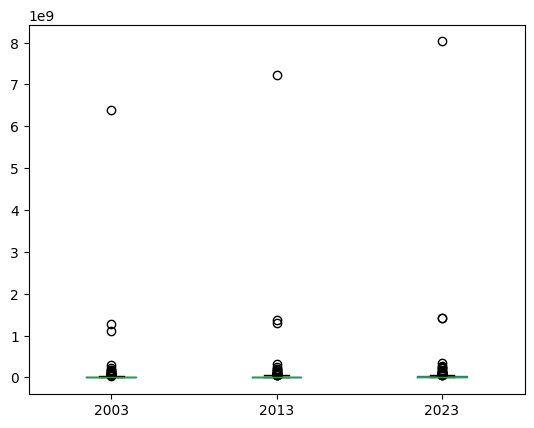

In [21]:
import matplotlib.pyplot as plt  

df.boxplot(column =['2003', '2013', '2023'], grid = False) # this is native to pandas which uses matplotlib without us having to call it
plt.show()


In [22]:
# we know the "world" row is the outlier, which is not a country, so let's remove it
# remember: we can just re-run the cell that copies the og data to undo this change)

# option 1: only keep other rows
df = df[df['Country Name'] != 'World']

# option 2: drop specific row
#df = df.drop(df.loc[df['Country Name'] == 'World'])

# option 3: see the option with ~ below (just search for the tilde with ctr+f)

# check that there is one row less:
print(df.shape)


(217, 13)


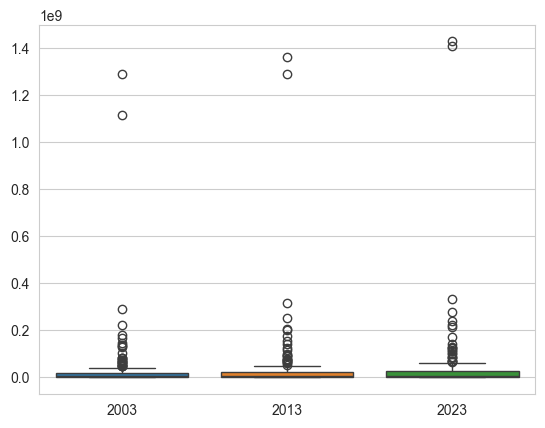

In [23]:
import seaborn as sns  # remember to install this in your environment first

# plot again, this time with seaborn, and you can watch India overtake China

sns.set_style("whitegrid") 

columns_to_plot = ['2003', '2013', '2023']
  
sns.boxplot(data = df[columns_to_plot]) 
plt.show()

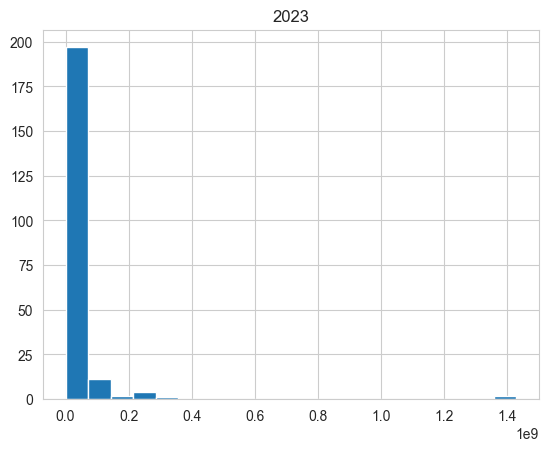

In [24]:
# play with the bins variable of the histogram
df.hist(column=['2023'], bins=20)
plt.show()

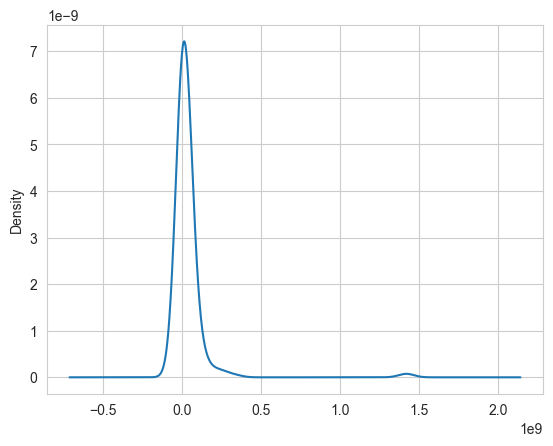

In [25]:
import scipy as sp

# kernel densities also give an idea of the overall distribution

df['2023'].plot.density()
plt.show()

##### Population growth over time


- Which county has seen the greatest population growth from the start to the end of the timeline?
    - In absolute terms?
    - In relative terms?
    - What about the greatest decrease?

In [26]:
# create a new column that shows the difference between 2001 and 2023 - not that the absolute value would not be helpful

df['gwth_2023_2001_abs'] = df['2023'] - df['2001'] 
df['gwth_2023_2001_rel'] = round(df['gwth_2023_2001_abs'] / df['2001'], 2)
df.head(2)

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023,gwth_2023_2001_abs,gwth_2023_2001_rel
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,19688632,21000256,22645130,29249157,30466479,31541209,40099462,41128771,42239854,22551222,1.15
1,"Population, total",SP.POP.TOTL,Albania,ALB,3060173,3051010,3039616,2905195,2900401,2895092,2811666,2777689,2745972,-314201,-0.10


In [27]:
# find the highest growth values - you can of course to the equivalent for the smallest (i.e. most negative) values
# bonus: can you find the countries with the samlles positive growth?

print('Greatest absolute growth from 2001 to 2023: ')
print('   - Country: ', df.nlargest(1, 'gwth_2023_2001_abs')['Country Name'])
print('   - Growth: ', df.nlargest(1, 'gwth_2023_2001_abs')['gwth_2023_2001_abs'])

print('\n') # this prints a line break

print('Greatest relative growth from 2001 to 2023: ')
print('   - Country: ', df.nlargest(1, 'gwth_2023_2001_rel')['Country Name'])
print('   - Growth: ', df.nlargest(1, 'gwth_2023_2001_rel')['gwth_2023_2001_rel'])

Greatest absolute growth from 2001 to 2023: 
   - Country:  89    India
Name: Country Name, dtype: object
   - Growth:  89    349656756
Name: gwth_2023_2001_abs, dtype: int64


Greatest relative growth from 2001 to 2023: 
   - Country:  159    Qatar
Name: Country Name, dtype: object
   - Growth:  159    3.0
Name: gwth_2023_2001_rel, dtype: float64


##### Comparing rows (countries)


Addresses the following questions from class:
- Show just the rows for Spain and your country/ countries of origin
    - Can you create a new row that shows the difference in population over time?
    - Can you plot this?

In [28]:
# displaying only selected countries

df.loc[( df['Country Name']== 'Germany') | (df['Country Name']== 'United Kingdom') | (df['Country Name']== 'Spain')]

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023,gwth_2023_2001_abs,gwth_2023_2001_rel
73,"Population, total",SP.POP.TOTL,Germany,DEU,82349925,82488495,82534176,80274983,80425823,80645605,83196078,83797985,84482267,2132342,0.03
179,"Population, total",SP.POP.TOTL,Spain,ESP,40850412,41431558,42187645,46742697,46773055,46620045,47415794,47778340,48373336,7522924,0.18
205,"Population, total",SP.POP.TOTL,United Kingdom,GBR,59119673,59370479,59647577,63258810,63700215,64128273,67026292,67791000,68350000,9230327,0.16


In [29]:
# slightly neater and more flexible

country_choices = ['Germany', 'United Kingdom', 'Spain']

df.loc[df['Country Name'].isin(country_choices)].sort_values('2023', ascending=False) # here I am also specifying what to sort by

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023,gwth_2023_2001_abs,gwth_2023_2001_rel
73,"Population, total",SP.POP.TOTL,Germany,DEU,82349925,82488495,82534176,80274983,80425823,80645605,83196078,83797985,84482267,2132342,0.03
205,"Population, total",SP.POP.TOTL,United Kingdom,GBR,59119673,59370479,59647577,63258810,63700215,64128273,67026292,67791000,68350000,9230327,0.16
179,"Population, total",SP.POP.TOTL,Spain,ESP,40850412,41431558,42187645,46742697,46773055,46620045,47415794,47778340,48373336,7522924,0.18


In [31]:
import numpy as np 

# to take the difference row-wise, I need to select only the columns that contain numbers and are relevant

year_cols = ['2001', '2002', '2003', '2011', '2012', '2013', '2021', '2022', '2023']

df = df.copy() # otherwise you'll get a warning about assinging values that might overwrite existing ones

# we can also make the index (i.e. the row name) more meaningful by inserting the country code
df.set_index(df['Country Code'], inplace=True)

# create rows if they don't exist
if 'diff_deu_gbr' not in df.index:
    df.loc['diff_deu_gbr'] = np.nan # making the default value Nan

if 'diff_deu_esp' not in df.index:
    df.loc['diff_deu_esp'] = 0      # making the default value 0

for col in year_cols:
    df.loc['diff_deu_gbr', col] = df.loc['DEU', col] - df.loc['GBR', col]
    df.loc['diff_deu_esp', col] = df.loc['DEU', col] - df.loc['ESP', col]

df.loc[['DEU', 'GBR', 'ESP'], ['Country Name', 'Series Name'] + year_cols ]


,Country Name,Series Name,2001,2002,2003,2011,2012,2013,2021,2022,2023
Country Code,,,,,,,,,,,
DEU,Germany,"Population, total",82349925.0,82488495.0,82534176.0,80274983.0,80425823.0,80645605.0,83196078.0,83797985.0,84482267.0
GBR,United Kingdom,"Population, total",59119673.0,59370479.0,59647577.0,63258810.0,63700215.0,64128273.0,67026292.0,67791000.0,68350000.0
ESP,Spain,"Population, total",40850412.0,41431558.0,42187645.0,46742697.0,46773055.0,46620045.0,47415794.0,47778340.0,48373336.0


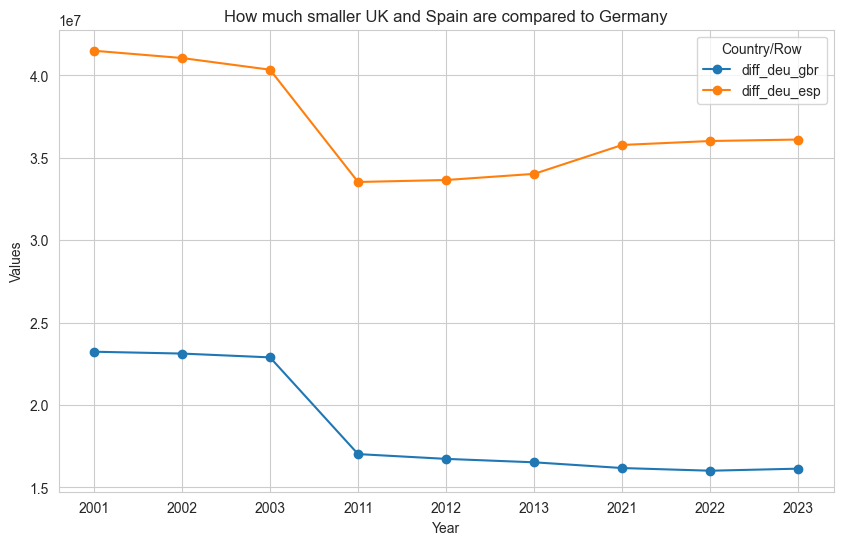

In [33]:
# plotting from rows
rows_to_plot = ['diff_deu_gbr', 'diff_deu_esp']
data_to_plot = df.loc[rows_to_plot, year_cols]

# transpose the data to make the columns the x-axis (years) and the rows the data series
data_to_plot = data_to_plot.T

# plot the data
data_to_plot.plot(kind='line', marker='o', figsize=(10, 6))

# specify labels and title
plt.title('How much smaller UK and Spain are compared to Germany')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(title='Country/Row')

# show the plot
plt.show()

##### Better solution - using transpose to compare columns instead

In [34]:
# the above is really cumbersome, so it's much easier to transpose the data from the beginning
# to work only with the subset we can store it in a new data frame

# country_choices = ['Germany', 'United Kingdom', 'Spain'] # this was already set above

df_subset = df.loc[df['Country Name'].isin(country_choices) ]

print(df_subset.shape)
df_subset

(3, 15)


,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023,gwth_2023_2001_abs,gwth_2023_2001_rel
Country Code,,,,,,,,,,,,,,,
DEU,"Population, total",SP.POP.TOTL,Germany,DEU,82349925.0,82488495.0,82534176.0,80274983.0,80425823.0,80645605.0,83196078.0,83797985.0,84482267.0,2132342.0,0.03
ESP,"Population, total",SP.POP.TOTL,Spain,ESP,40850412.0,41431558.0,42187645.0,46742697.0,46773055.0,46620045.0,47415794.0,47778340.0,48373336.0,7522924.0,0.18
GBR,"Population, total",SP.POP.TOTL,United Kingdom,GBR,59119673.0,59370479.0,59647577.0,63258810.0,63700215.0,64128273.0,67026292.0,67791000.0,68350000.0,9230327.0,0.16


In [35]:
# this is what tranposing does - note the nice column names thanks to changing the index
df_transposed = df_subset.T
df_transposed

Country Code,DEU,ESP,GBR
Series Name,"Population, total","Population, total","Population, total"
Series Code,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL
Country Name,Germany,Spain,United Kingdom
Country Code,DEU,ESP,GBR
2001,82349925.0,40850412.0,59119673.0
2002,82488495.0,41431558.0,59370479.0
2003,82534176.0,42187645.0,59647577.0
2011,80274983.0,46742697.0,63258810.0
2012,80425823.0,46773055.0,63700215.0
2013,80645605.0,46620045.0,64128273.0


In [36]:
# I can drop the repeated information to make it neaters

to_drop = ['Country Code', 'Series Name', 'Series Code', 'Country Name'] # without this the transpose creates repeated values
df_subset2 = df_subset.drop(columns=to_drop)

df_transposed = pd.DataFrame(df_subset2.T)
df_transposed

Country Code,DEU,ESP,GBR
2001,82349925.00,40850412.00,59119673.00
2002,82488495.00,41431558.00,59370479.00
2003,82534176.00,42187645.00,59647577.00
2011,80274983.00,46742697.00,63258810.00
2012,80425823.00,46773055.00,63700215.00
2013,80645605.00,46620045.00,64128273.00
2021,83196078.00,47415794.00,67026292.00
2022,83797985.00,47778340.00,67791000.00
2023,84482267.00,48373336.00,68350000.00
gwth_2023_2001_abs,2132342.00,7522924.00,9230327.00


In [37]:
# now finding the differences is easier
df_transposed['diff_deu_esp'] = df_transposed['DEU'] - df_transposed['ESP']
df_transposed['diff_deu_gbr'] = df_transposed['DEU'] - df_transposed['GBR']
df_transposed

Country Code,DEU,ESP,GBR,diff_deu_esp,diff_deu_gbr
2001,82349925.00,40850412.00,59119673.00,41499513.00,23230252.00
2002,82488495.00,41431558.00,59370479.00,41056937.00,23118016.00
2003,82534176.00,42187645.00,59647577.00,40346531.00,22886599.00
2011,80274983.00,46742697.00,63258810.00,33532286.00,17016173.00
2012,80425823.00,46773055.00,63700215.00,33652768.00,16725608.00
2013,80645605.00,46620045.00,64128273.00,34025560.00,16517332.00
2021,83196078.00,47415794.00,67026292.00,35780284.00,16169786.00
2022,83797985.00,47778340.00,67791000.00,36019645.00,16006985.00
2023,84482267.00,48373336.00,68350000.00,36108931.00,16132267.00
gwth_2023_2001_abs,2132342.00,7522924.00,9230327.00,-5390582.00,-7097985.00


### 2. Background cleaning

What I did to give you a slightly nicer data set - shows how to store data frames as csvs and how to rename columns using a dictionary

In [41]:
df_WB = pd.read_csv(cwd + '/WB_data.csv')
#df_meta = pd.read_csv(cwd + '/WB_data.csv')

df_WB.head()

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,19688632,21000256,22645130,29249157,30466479,31541209,40099462,41128771,42239854
1,"Population, total",SP.POP.TOTL,Albania,ALB,3060173,3051010,3039616,2905195,2900401,2895092,2811666,2777689,2745972
2,"Population, total",SP.POP.TOTL,Algeria,DZA,31200985,31624696,32055883,36543541,37260563,38000626,44177969,44903225,45606480
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,58324,58177,57941,54310,53691,52995,45035,44273,43914
4,"Population, total",SP.POP.TOTL,Andorra,AND,67820,70849,73907,70567,71013,71367,79034,79824,80088


In [42]:
# cols_to_clean = [
#     '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]', '2011 [YR2011]',
#     '2012 [YR2012]', '2013 [YR2013]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]']

# cols_to_clean might include other non-year columns
cols_to_clean = df_WB.columns.tolist()

# Creating a dictionary to map the year columns from '2001 [YR2001]' to just '2001'
rename_dict = {col: col.split()[0] for col in cols_to_clean if '[YR' in col}

# Using rename to only change the year columns and leave the rest intact
df_WB = df_WB.rename(columns=rename_dict)

df_WB.head(2)

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,19688632,21000256,22645130,29249157,30466479,31541209,40099462,41128771,42239854
1,"Population, total",SP.POP.TOTL,Albania,ALB,3060173,3051010,3039616,2905195,2900401,2895092,2811666,2777689,2745972


In [43]:
df_pop = df_WB.loc[df_WB['Series Code']=='SP.POP.TOTL']

country_groups = [
    "AFE", "AFW", "ARB", "CSS", "CEB", "EAR", "EAS", "EAP", "TEA", "EMU", 
    "ECS", "ECA", "TEC", "EUU", "FCS", "HPC", "HIC", "IBD", "IBT", "IDB", 
    "IDX", "IDA", "LTE", "LCN", "LAC", "TLA", "LDC", "LMY", "LIC", "LMC", 
    "MEA", "MNA", "TMN", "MIC", "NAC", "INX", "OED", "OSS", "PSS", "PST", 
    "PRE", "SST", "SAS", "TSA", "SSF", "SSA", "TSS", "UMC"]

world = ["WLD"]

filtered_df = df_pop[~df_pop['Country Code'].isin(country_groups)]

filtered_df.shape


(218, 13)

In [44]:
# download
#filtered_df.to_csv(cwd + '/data/WB_pop_clean.csv', index=False)